In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns
import sklearn as sk
import re

In [2]:
# 한글 출력
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

In [ ]:
팀 상황 알아보기(삼성 라이온즈)

In [3]:
df = pd.read_excel(r'D:\IT\mywork\Project\KBO-Analysis\dataset\kbo_team2.xlsx', encoding='utf-8', index=False)
samsung = df[df.Team == '삼성'].reset_index(drop=True)
samsung.head()

,Team,Season,WAR,G,PA,AB,R,H,2B,3B,...,OPS,wOBA,WRC+,순위,경기,승,패,무,승률,게임차
0,삼성,1982,18.61,887,3043,2647,429,705,126,18,...,0.739,0.338,104.3,2,80,54,26,0,0.675,2.0
1,삼성,1983,23.31,1249,3847,3383,448,889,143,14,...,0.726,0.332,110.3,4,100,46,50,4,0.479,7.5
2,삼성,1984,24.07,1262,3756,3298,435,889,147,18,...,0.739,0.339,113.9,2,100,55,45,0,0.550,-4.0
3,삼성,1985,29.97,1513,4250,3644,552,1005,181,22,...,0.772,0.351,117.9,1,110,77,32,1,0.706,0.0
4,삼성,1986,30.54,1527,4119,3617,475,997,177,22,...,0.744,0.346,123.2,2,108,70,37,1,0.654,-1.5


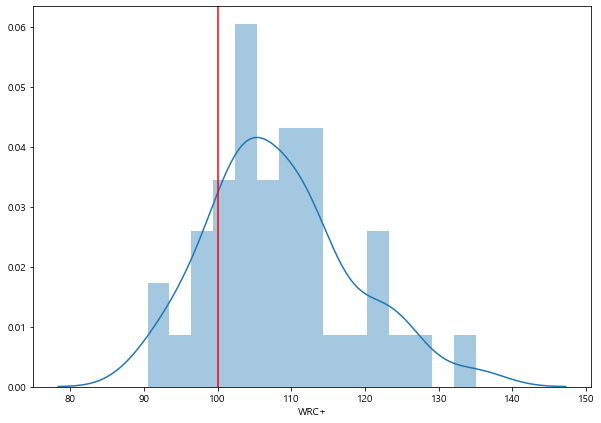

In [4]:
plt.figure(figsize=[10, 7])
sns.distplot(samsung['WRC+'], bins=15)
plt.axvline(x=100, color='r')
plt.show()

In [5]:
under = samsung[samsung['WRC+']<100]
under

,Team,Season,WAR,G,PA,AB,R,H,2B,3B,...,OPS,wOBA,WRC+,순위,경기,승,패,무,승률,게임차
25,삼성,2007,20.97,1657,4895,4186,497,1062,191,9,...,0.706,0.326,97.0,4,126,62,60,4,0.508,11.5
29,삼성,2011,25.18,1689,5145,4437,625,1150,193,20,...,0.719,0.334,98.9,1,133,79,50,4,0.612,0.0
35,삼성,2017,16.82,1786,5707,5095,757,1419,255,36,...,0.768,0.337,92.7,9,144,55,84,5,0.396,30.0
36,삼성,2018,19.89,1717,5766,5109,776,1471,241,29,...,0.787,0.344,96.6,6,144,68,72,4,0.486,23.0
37,삼성,2019,17.45,1652,5533,4866,622,1245,230,26,...,0.718,0.328,94.7,8,144,60,83,1,0.420,28.0
38,삼성,2020,15.66,1865,5574,4923,699,1317,211,12,...,0.732,0.333,90.5,8,144,64,75,5,0.460,19.5


In [ ]:
삼성 라이온즈 역사상 WRC+가 평균인 100 이하로 떨어진 적은 손에 꼽을 정도임. 즉, 삼성은 항상 높은 생산성을 가진 타선을 자랑했던 팀이고
심지어 2000년대 중반의 침체기 때도 2007년을 제외하고는 평균 이상의 생산성을 유지했음.

In [6]:
years = [2007, 2011, 2016, 2017, 2018, 2019, 2020]
compare = pd.DataFrame()

for year in years:
    s = samsung[samsung.Season == year]
    compare = pd.concat([compare, s[['Season', 'WRC+', 'WAR', 'AVG', 'OBP', 'SLG', 'OPS', 'wOBA']]])

compare.reset_index(inplace=True, drop=True)
compare

,Season,WRC+,WAR,AVG,OBP,SLG,OPS,wOBA
0,2007,97.0,20.97,0.254,0.341,0.365,0.706,0.326
1,2011,98.9,25.18,0.259,0.343,0.376,0.719,0.334
2,2016,100.1,22.21,0.293,0.367,0.439,0.806,0.360
3,2017,92.7,16.82,0.279,0.340,0.428,0.768,0.337
4,2018,96.6,19.89,0.288,0.355,0.432,0.787,0.344
5,2019,94.7,17.45,0.256,0.329,0.389,0.718,0.328
6,2020,90.5,15.66,0.268,0.338,0.394,0.732,0.333


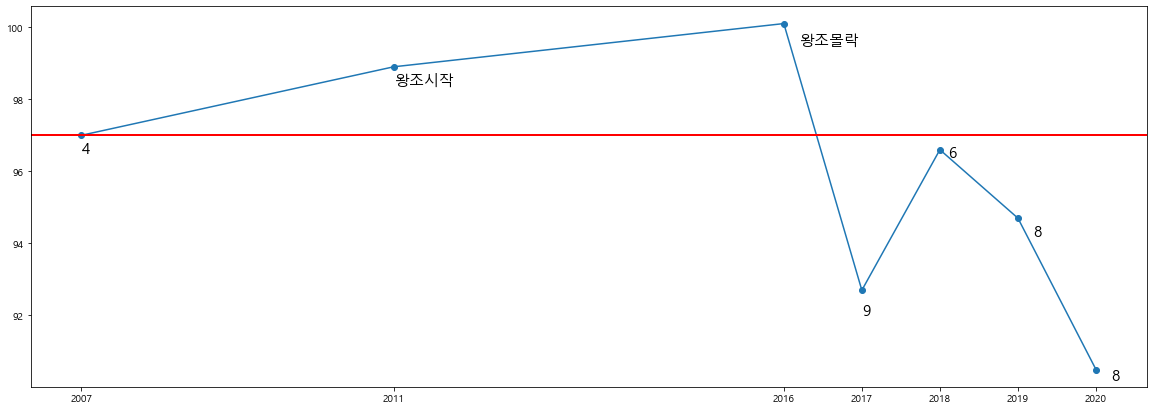

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(compare.Season, compare['WRC+'], marker='o')
plt.axhline(y=97, color='r', linewidth=2)

plt.text(2007, 96.5, '4', fontsize=15)
plt.text(2011, 98.4, '왕조시작', fontsize=15)
plt.text(2016.2, 99.5, '왕조몰락', fontsize=15)
plt.text(2017, 92, '9', fontsize=15)
plt.text(2018.1, 96.4, '6', fontsize=15)
plt.text(2019.2, 94.2, '8', fontsize=15)
plt.text(2020.2, 90.2, '8', fontsize=15)

plt.xticks(compare.Season)
plt.show()

In [ ]:
하지만, FA로 팀의 클린업을 담당하던 주요 타자들이 이탈한 2016년을 기점으로, 삼성 타자들의 WRC+는 2007년의 소위 '삼점 라이온즈' 시절
이하로 급격하게 추락함. 암흑기 동안 꾸준하게 기록중인 100 이하의 팀WRC+는 타자가 타석에 들어서서 무엇을 해도 평균보다 더 점수를
못낸다는 것을 의미함.

다만, 팀 타선의 생산성이 2007년 수준으로 살짝 반등했었던 2018년에 팀이 마지막까지 가을 야구를 경쟁했었다는 것을 생각해보면, 
이 팀은 타선만 뒷받침 된다면 충분히 재도약이 가능할 것으로 보임. 하지만 2018년의 반등이 이어지지 못하고 2년만에 팀 역사상
최악의 WRC+인 90.5를 기록했다는 것은 타자들의 기량이 2년동안 전혀 늘지 않았다는 것이고, 타선 리빌딩이 실패 했다는 것을 의미함.

즉, 게임처럼 갑자기 유망주들의 잠재력이 한꺼번에 폭발해서 순식간에 리빌딩이 이뤄지는 것이 아닌 이상, 역대 최악의 변비타선을 
해결하기 위해서는 FA영입을 통한 타선 보강이 절실해 보임.

In [8]:
df = pd.read_excel(r'D:\IT\mywork\Project\KBO-Analysis\dataset\kbo_batter2.xlsx', encoding='utf-8', index=False)
df.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,백인천,1982,1943-11-27,M,DH,5.88,72,298,250,55,...,5,0,3,0.412,0.497,0.740,1.237,0.528,227.0,39
1,윤동균,1982,1949-07-02,O,LF,4.13,77,334,284,54,...,3,0,4,0.342,0.428,0.532,0.960,0.430,164.6,33
2,이만수,1982,1958-09-19,삼,C,4.12,78,322,270,46,...,13,0,1,0.289,0.399,0.500,0.899,0.405,147.6,24
3,김봉연,1982,1952-01-13,해,DH,3.68,74,304,269,55,...,8,0,1,0.331,0.405,0.636,1.040,0.453,180.5,30
4,김우열,1982,1949-09-09,O,CF,3.46,62,255,210,43,...,0,0,1,0.310,0.428,0.533,0.961,0.426,161.9,33


In [9]:
df.corr()['WRC+'].sort_values(ascending=False).head(6)

WRC+    1.000000
wOBA    0.993386
OPS     0.980681
OBP     0.946236
SLG     0.925187
AVG     0.904526
Name: WRC+, dtype: float64

In [ ]:
WRC+와 상관관계가 높은 지표들은 타/출/장/OPS/wOBA

In [10]:
df2020 = df[df.Season == 2020].reset_index(drop=True)
for idx in df2020.index:
    if len(df2020.iloc[idx].Team) == 2:
        x = df2020.iloc[idx].copy()
        x.Team = x.Team[-1]
        df2020.iloc[idx] = x

df2020.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,로하스,2020,1990-05-24,K,RF,7.80,142,628,550,116,...,11,0,8,0.349,0.417,0.680,1.097,0.467,180.9,30
1,김하성,2020,1995-10-17,키,SS,6.87,138,622,533,111,...,12,3,3,0.306,0.397,0.523,0.921,0.407,147.4,25
2,양의지,2020,1987-06-05,N,C,5.95,130,528,461,86,...,11,1,6,0.328,0.400,0.603,1.003,0.432,153.3,33
3,터커,2020,1990-07-06,K,RF,5.70,142,631,542,100,...,12,0,4,0.306,0.398,0.557,0.955,0.420,148.9,30
4,최형우,2020,1983-12-16,K,DH,5.70,140,600,522,93,...,9,0,3,0.354,0.433,0.590,1.023,0.450,168.4,37


In [11]:
df2020.PA.describe()

count    273.000000
mean     207.245421
std      199.599439
min        1.000000
25%       37.000000
50%      128.000000
75%      369.000000
max      668.000000
Name: PA, dtype: float64

In [12]:
compare = df2020[df2020.PA > 128].reset_index(drop=True).copy()
falist = ['오재일', '최주환', '허경민', '김재호', '정수빈', '최형우']

for idx in compare.index:
    if compare.iloc[idx].Team != '삼':
        if compare.iloc[idx].Name in falist:
            x = compare.iloc[idx].copy()
            x.Team = 'FA'
            compare.iloc[idx] = x
        else:
            x = compare.iloc[idx].copy()
            x.Team = 'Other'
            compare.iloc[idx] = x

compare.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,로하스,2020,1990-05-24,Other,RF,7.80,142,628,550,116,...,11,0,8,0.349,0.417,0.680,1.097,0.467,180.9,30
1,김하성,2020,1995-10-17,Other,SS,6.87,138,622,533,111,...,12,3,3,0.306,0.397,0.523,0.921,0.407,147.4,25
2,양의지,2020,1987-06-05,Other,C,5.95,130,528,461,86,...,11,1,6,0.328,0.400,0.603,1.003,0.432,153.3,33
3,터커,2020,1990-07-06,Other,RF,5.70,142,631,542,100,...,12,0,4,0.306,0.398,0.557,0.955,0.420,148.9,30
4,최형우,2020,1983-12-16,FA,DH,5.70,140,600,522,93,...,9,0,3,0.354,0.433,0.590,1.023,0.450,168.4,37


In [13]:
X = compare[(compare.Team == '삼') | (compare.Team == 'FA')].Age
Y = compare[(compare.Team == '삼') | (compare.Team == 'FA')]['WRC+']
name = compare[(compare.Team == '삼') | (compare.Team == 'FA')].Name

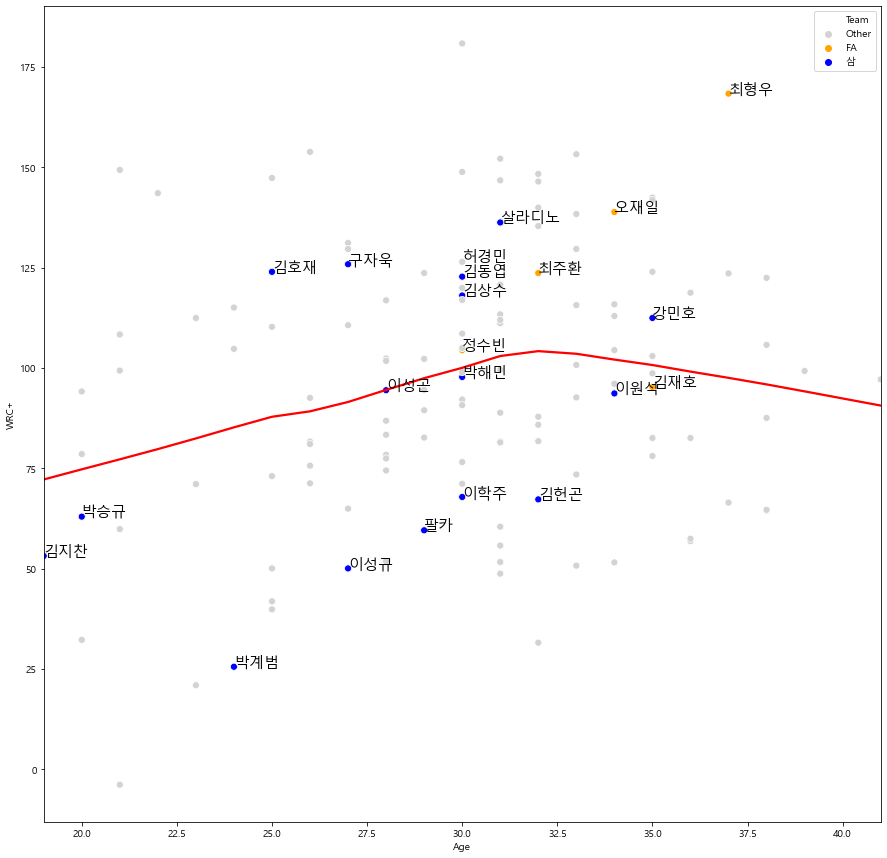

In [14]:
plt.figure(figsize=[15, 15])
sns.regplot(x='Age', y='WRC+', lowess=True, data=compare, line_kws={'color': 'red'}, scatter=False)
sns.scatterplot('Age', 'WRC+', data=compare, hue=compare.Team, s=50, palette=['lightgrey','orange','blue'])

for x, y, n in zip(X, Y, name):
    if n == '허경민':
        plt.text(x, y+4, n, fontsize=15)
    else:
        plt.text(x, y, n, fontsize=15)
        
plt.show()

In [ ]:
올해의 삼성타선은 구자욱, 김동엽, 강민호, 김상수를 제외하고는 모두 득점 생산성이 최하위권에 위치함.
특히 주전으로 많은 기회를 부여받았던 이성규와 대체용병 팔카는 평균에도 한참 못미치는 압도적으로 부진한 성적을 보여주었음.

다만 34세의 이원석이 평균 근처에서 그럭저럭 선방을 해주었고, 타선의 핵심인 구자욱과 김동엽이 해당 나이대에서
최상위권의 WRC+를 기록했다는 것은 긍정적인 면이라고 볼 수 있음.

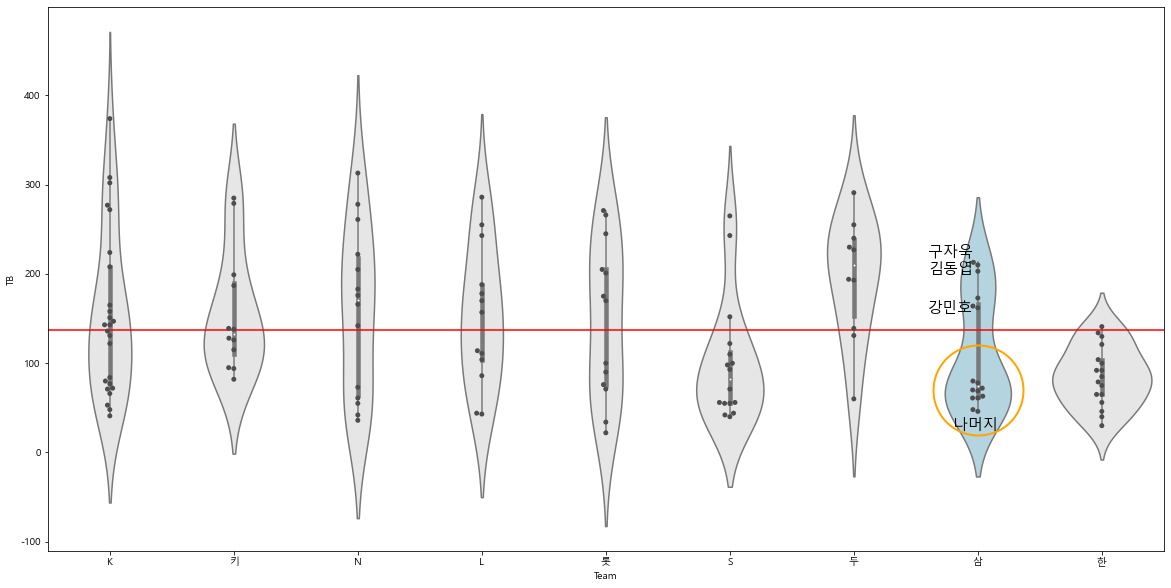

In [138]:
compare2 = df2020[df2020.PA > 128].reset_index(drop=True).copy()

palette = ['0.9', '0.9', '0.9', '0.9', '0.9','0.9', '0.9', 'lightblue', '0.9']
plt.figure(figsize=[20,10])

sns.violinplot(x=compare2.Team, y=compare2.TB, orient='v', palette=palette)
plt.axhline(y=compare2.TB.mean(), color='r')
sns.swarmplot(x='Team', y='TB', data=compare2, color='0.3')
plt.plot(7, 70, 'o', ms= 45* 2, mec='Orange', mfc='none', mew=2)
plt.text(6.8, 25, '나머지', fontsize=15)
plt.text(6.6, 220, '구자욱', fontsize=15)
plt.text(6.6, 200, '김동엽', fontsize=15)
plt.text(6.6, 156, '강민호', fontsize=15)
plt.show()

In [ ]:
위 boxplot을 보면, 올해 하위권을 차지한 삼성, SK, 한화의 팀 평균은 리그 평균(빨간선)과 한참 떨어진 곳에 머무르고 있음.
하지만 어느 정도 고른 분포를 보인 한화와는 달리 삼성과 SK는 일부 선수 몇명을 제외하고는 극단적으로 하향평준화된 분포를 보이고 있음.

올해 한국시리즈에 진출한 NC와 두산의 분포와 비교해 보면, 두산의 팀타선은 평균 이상의 선수들로 구성되어 찬스때 확실한 득점을 노릴 수
있는 분포이고, NC는 고른 분포의 안정적인 팀타선으로 언제 어디서든 득점이 나올 수 있는 타선이라고 볼 수 있음. 그에 비해 올해 삼성 타선의
분포는 일부 선수 몇명을 제외하고는 극단적으로 하향평준화된 모습을 보이고 있음. 이를 통해, 올해 삼성이 역사상 최악의 팀 WRC+를 기록한
원인은 리그 수준급의 생산력을 보유한 선수들이 있어도 득점으로 이어나가지 못하는 하향평준화된 타선 때문임.

In [ ]:
# 에이징 커브 알아보기

In [172]:
name = set(df.Name)
aging_df = pd.DataFrame()

for n in name:
    active = df[df.Name == n].Season
    if len(active) > 8:
        aging_df = pd.concat([aging_df, df[df.Name == n]], ignore_index=True)
        
aging_df = aging_df[aging_df.PA > 100]
aging_df

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,박정태,1991,1969-01-27,롯,2B,4.20,122,528,463,69,...,17,8,9,0.285,0.346,0.464,0.811,0.363,122.8,22
1,박정태,1992,1969-01-27,롯,2B,6.60,124,529,445,91,...,12,3,7,0.335,0.424,0.539,0.963,0.429,160.2,23
2,박정태,1993,1969-01-27,롯,2B,1.82,31,123,103,10,...,4,1,0,0.359,0.459,0.485,0.945,0.433,186.3,24
3,박정태,1995,1969-01-27,롯,2B,2.56,50,201,178,21,...,2,0,1,0.337,0.408,0.472,0.880,0.402,161.3,26
4,박정태,1996,1969-01-27,롯,2B,3.68,94,405,366,49,...,11,2,2,0.309,0.367,0.424,0.791,0.363,131.6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,김태형,1993,1967-09-12,O,C,1.77,107,278,242,22,...,5,14,5,0.277,0.318,0.364,0.682,0.304,94.2,26
3800,김태형,1994,1967-09-12,O,C,0.21,81,224,199,19,...,3,13,0,0.231,0.275,0.291,0.566,0.253,52.5,27
3801,김태형,1995,1967-09-12,O,C,0.15,93,215,194,20,...,4,9,2,0.216,0.252,0.294,0.546,0.243,49.1,28
3802,김태형,1996,1967-09-12,O,C,0.84,85,263,254,24,...,7,7,0,0.272,0.277,0.323,0.600,0.272,67.1,29


In [174]:
aging_df.groupby(aging_df.Age).nunique().Name

Age
18      1
19     28
20     45
21     45
22     73
23    142
24    179
25    189
26    213
27    228
28    230
29    241
30    237
31    229
32    201
33    179
34    148
35    113
36     80
37     53
38     37
39     18
40     10
41      8
Name: Name, dtype: int64

In [178]:
aging_df.drop(aging_df[(aging_df.Age == 18) | (aging_df.Age > 38)].index, axis=0, inplace=True)
aging_df.head()

,Name,Season,Birth,Team,Position,WAR,G,PA,AB,R,...,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+,Age
0,박정태,1991,1969-01-27,롯,2B,4.20,122,528,463,69,...,17,8,9,0.285,0.346,0.464,0.811,0.363,122.8,22
1,박정태,1992,1969-01-27,롯,2B,6.60,124,529,445,91,...,12,3,7,0.335,0.424,0.539,0.963,0.429,160.2,23
2,박정태,1993,1969-01-27,롯,2B,1.82,31,123,103,10,...,4,1,0,0.359,0.459,0.485,0.945,0.433,186.3,24
3,박정태,1995,1969-01-27,롯,2B,2.56,50,201,178,21,...,2,0,1,0.337,0.408,0.472,0.880,0.402,161.3,26
4,박정태,1996,1969-01-27,롯,2B,3.68,94,405,366,49,...,11,2,2,0.309,0.367,0.424,0.791,0.363,131.6,27


In [177]:
group_df = aging_df.groupby(aging_df.Age).mean().round(3).drop('Season', axis=1)
group_df.reset_index(inplace=True)
group_df.head()

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,SO,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+
0,19,1.191,88.036,269.500,236.964,33.250,61.679,11.429,1.607,5.464,...,48.071,4.893,4.071,1.893,0.256,0.328,0.380,0.708,0.323,92.118
1,20,1.648,94.956,311.822,273.244,38.044,74.000,13.089,1.978,5.556,...,52.444,5.133,5.511,2.156,0.265,0.334,0.386,0.719,0.327,97.984
2,21,1.791,101.222,340.178,297.067,41.800,80.600,13.756,2.022,6.578,...,51.089,5.778,6.844,2.000,0.261,0.329,0.380,0.709,0.321,93.020
3,22,2.010,97.904,341.877,297.082,43.164,79.712,13.986,1.740,8.192,...,49.877,6.370,5.589,3.384,0.259,0.330,0.389,0.720,0.326,97.815
4,23,2.038,100.594,338.259,294.252,41.832,79.021,14.385,2.070,7.322,...,49.350,5.804,6.350,2.524,0.259,0.331,0.384,0.716,0.325,97.419


In [179]:
# to plot multiple graphs

def multi_graph(df, records, up, down, figsize = [15, 20]):
    plt.rcParams['figure.figsize'] = figsize
    minx = min(df.Age)
    maxx = max(df.Age)

    for idx, record in enumerate(records):
        plt.subplot(len(records), 1, idx+1)
        plt.plot(df.Age, df[record])
        plt.title(record, fontsize=15)
        plt.fill([minx, minx, maxx, maxx], [down[record], up[record], up[record], down[record]], color='lightgray', alpha=0.7)
        plt.axvline(x=33, color='r', linewidth=1)
        plt.xticks(df.Age)
        plt.show()

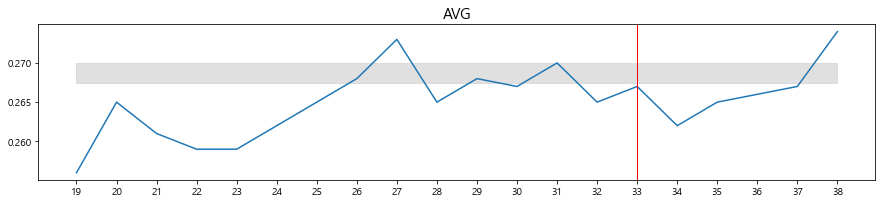

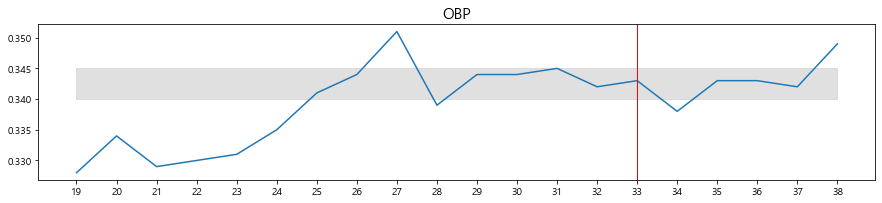

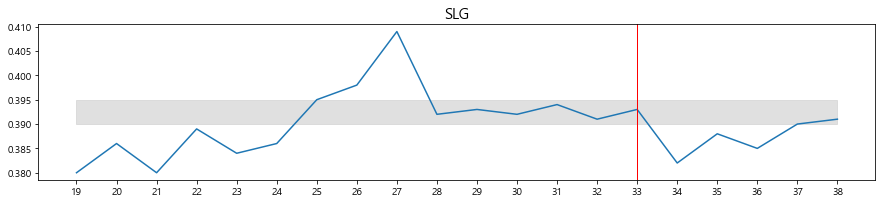

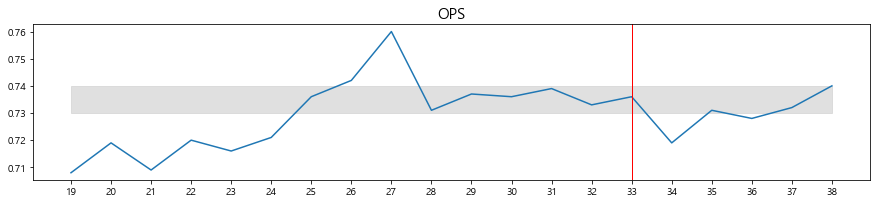

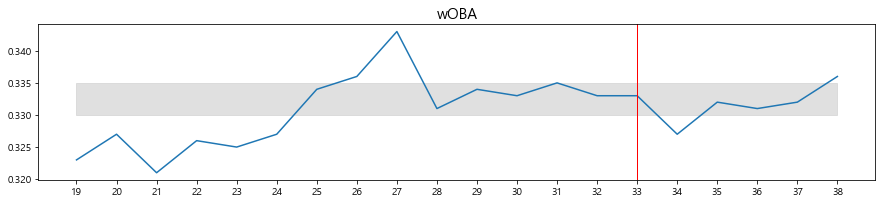

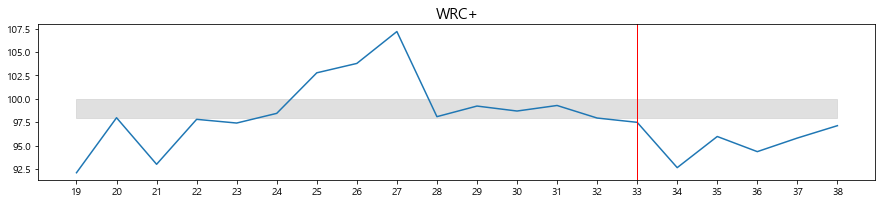

In [189]:
up = {'AVG': 0.270, 'OBP': 0.345, 'SLG': 0.395, 'OPS': 0.74, 'wOBA': 0.335, 'WRC+': 100}
down = {'AVG': 0.2675, 'OBP': 0.340, 'SLG': 0.390, 'OPS': 0.73, 'wOBA':0.33, 'WRC+': 98}
records = ['AVG', 'OBP', 'SLG', 'OPS', 'wOBA', 'WRC+']

multi_graph(group_df, records, up, down)

In [ ]:
KBO의 타자들은 25~27세에 전성기를 보낸 후, 33세를 기점으로 모든 타격지표가 급격하게 추락함. 이를 통해 일반적으로 KBO에서
타자의 에이징커브는 33세 부터 시작된다고 볼 수 있음.


1루수는 포지션 특성상 수비보다는 타격에 좀 더 중점을 두는 경향이 있음.

그렇기에 1루수의 WRC+는 120 이상의 높은 생산성을 가진 타자들로 구성되어 있음. 하지만, 1루수들 역시 에이징 커브가 본격적으로 시작되는 
33세 부터 WRC+가 리그 평균인 100으로 회귀하며 35세 때의 약간의 반등을 제외하고는 생산성이 급격히 추락하는 모습을 보임.

In [ ]:
# 포지션별

In [181]:
check = aging_df[aging_df.Position == '1B']
check.groupby(check.Age).nunique().Name

Age
19     5
20     8
21     7
22    10
23    14
24    24
25    23
26    24
27    30
28    31
29    33
30    23
31    25
32    25
33    26
34    23
35    15
36    18
37    11
38     7
Name: Name, dtype: int64

In [182]:
pos_df = aging_df.groupby([aging_df.Position, aging_df.Age]).mean().round(3).drop('Season', axis=1)
b1 = pos_df.query("Position == '1B'")
b1.reset_index(inplace=True)
b1 = b1.drop(b1[b1['Age'] <20].index)

b1

,Position,Age,WAR,G,PA,AB,R,H,2B,3B,...,SO,DP,SH,SF,AVG,OBP,SLG,OPS,wOBA,WRC+
1,1B,20,0.870,83.625,264.750,237.000,28.500,63.875,12.250,1.750,...,48.250,5.875,1.875,1.875,0.253,0.325,0.384,0.709,0.324,94.738
2,1B,21,2.643,93.143,370.571,326.429,46.857,98.429,18.429,1.857,...,54.857,6.857,3.429,1.714,0.286,0.359,0.462,0.820,0.363,121.600
3,1B,22,2.108,95.000,363.000,313.800,44.600,85.600,17.000,0.900,...,54.500,7.700,2.200,3.400,0.256,0.334,0.426,0.759,0.343,108.960
4,1B,23,2.766,103.286,373.571,317.429,55.929,92.214,18.000,1.857,...,57.929,6.214,2.500,3.071,0.268,0.353,0.431,0.783,0.350,111.679
5,1B,24,2.349,96.417,348.750,301.667,45.625,84.958,16.792,1.792,...,50.167,6.833,1.833,2.750,0.270,0.352,0.434,0.786,0.356,120.200
6,1B,25,2.464,94.043,350.261,300.174,43.913,85.391,14.565,1.739,...,48.696,7.609,1.261,2.826,0.276,0.364,0.431,0.795,0.363,125.383
7,1B,26,2.551,101.792,377.333,328.292,46.750,92.333,18.750,2.250,...,53.417,6.042,2.292,2.917,0.272,0.350,0.442,0.792,0.357,122.721
8,1B,27,2.590,96.800,354.500,307.133,46.333,90.000,16.033,1.100,...,53.233,6.267,1.567,2.733,0.285,0.367,0.472,0.839,0.375,129.180
9,1B,28,2.021,100.194,360.065,313.742,46.323,88.452,15.774,1.484,...,52.452,6.710,2.129,2.613,0.274,0.355,0.431,0.785,0.355,115.455
10,1B,29,2.254,99.394,354.727,304.424,45.091,86.667,15.909,1.455,...,50.121,7.152,2.576,2.909,0.274,0.364,0.436,0.800,0.362,121.042


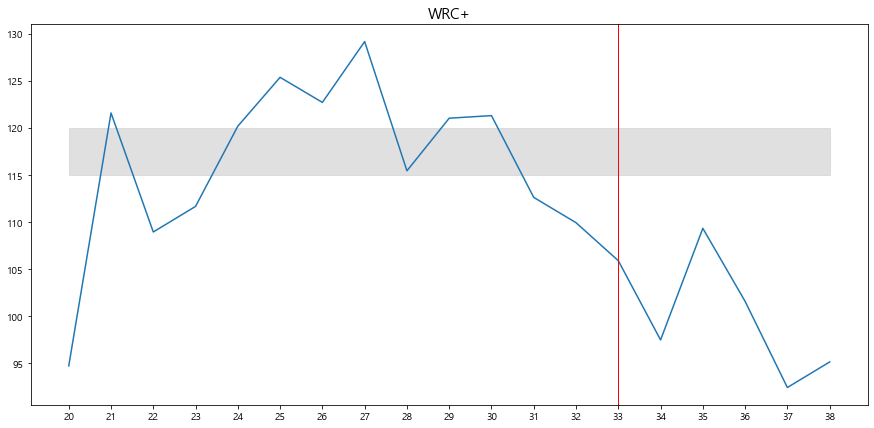

In [183]:
multi_graph(b1, ['WRC+'], {'WRC+':115}, {'WRC+': 120}, [15, 7])

In [ ]:
1루수는 포지션 특성상 수비보다는 타격에 좀 더 중점을 두는 경향이 있음.

그렇기에 1루수의 WRC+는 120 이상의 높은 생산성을 가진 타자들로 구성되어 있음. 하지만, 1루수들 역시 에이징 커브가 본격적으로 시작되는 
33세 부터 WRC+가 리그 평균인 100으로 회귀하며 35세 때의 약간의 반등을 제외하고는 생산성이 급격히 추락하는 모습을 보임.

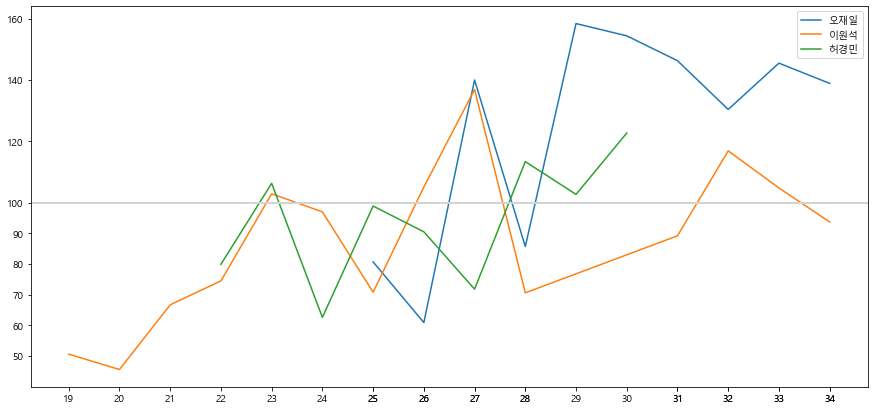

In [79]:
plt.figure(figsize=(15, 7))
oh = aging_df[aging_df.Name ==  '오재일']
lee = aging_df[aging_df.Name ==  '이원석']
heo = aging_df[aging_df.Name ==  '허경민']

plt.plot(oh.Age, oh['WRC+'], label='오재일')
plt.plot(lee.Age, lee['WRC+'], label='이원석')
plt.plot(heo.Age, heo['WRC+'], label='허경민')

plt.axhline(y=100, color='lightgray', linewidth=2)
plt.xticks(list(oh.Age.unique())+list(lee.Age.unique()))
plt.yticks([50, 60, 70, 80, 90, 100, 120, 140, 160])

plt.legend()
plt.show()

In [75]:
def compare_two(df1, df2, records, line, label, figsize = [15, 20]):
    plt.rcParams['figure.figsize'] = figsize

    for idx, record in enumerate(records):
        plt.subplot(len(records), 1, idx+1)
        plt.plot(df1.Age, df1[record], label=label[0])
        plt.plot(df1.Age, df2[record], label=label[1])
        plt.axhline(y=line[record], color='lightgray', linewidth=2)
        plt.title(record, fontsize=15)
        plt.xticks(df1.Age)
        plt.legend()
        plt.show()

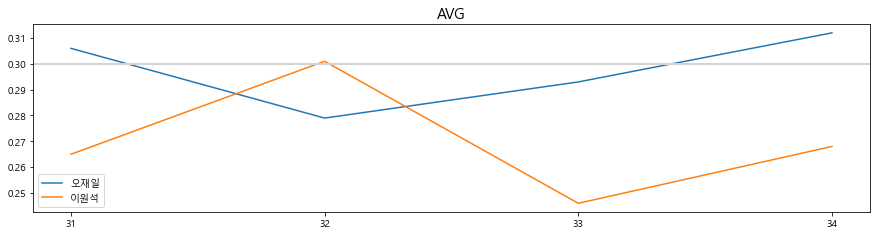

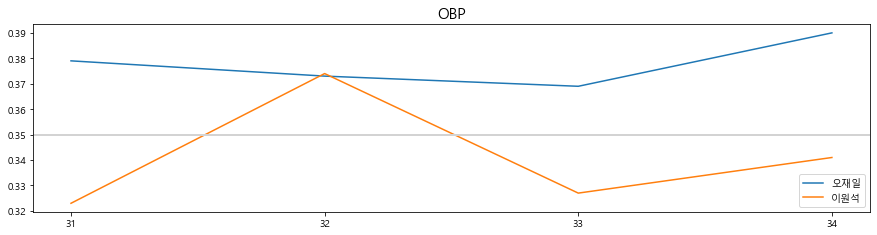

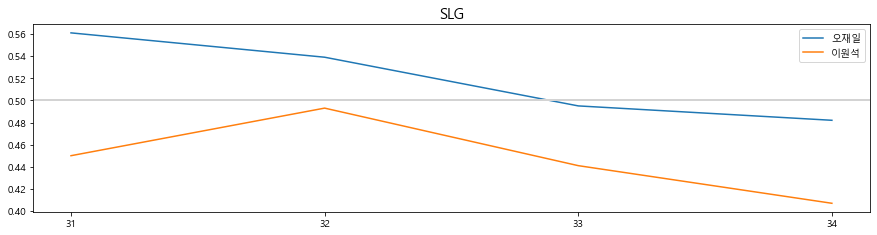

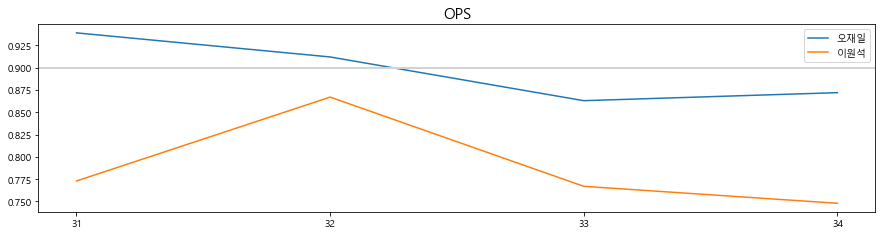

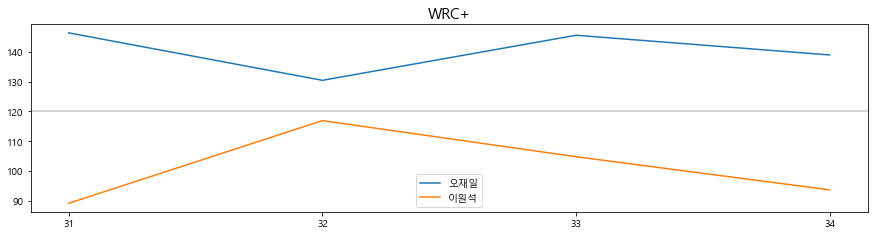

In [76]:
oh = aging_df[(aging_df.Name ==  '오재일') & (aging_df.Age > 30)]
lee = aging_df[(aging_df.Name ==  '이원석') & (aging_df.Age > 30)]
line = {'AVG': 0.3, 'OBP':0.35, 'SLG': 0.5, 'OPS': 0.9, 'WRC+':120}

compare_two(oh, lee, ['AVG', 'OBP', 'SLG', 'OPS', 'WRC+'], line, ['오재일', '이원석'])

In [ ]:
오재일, 이원석을 비교해 보면, 이원석은 1루수의 에이징 커브 시작점인 32세를 기점으로 WRC+ 지표가 꾸준히 하락하고 있으나
오재일은 반등에 성공하며 꾸준한 생산능력을 보이고 있음.

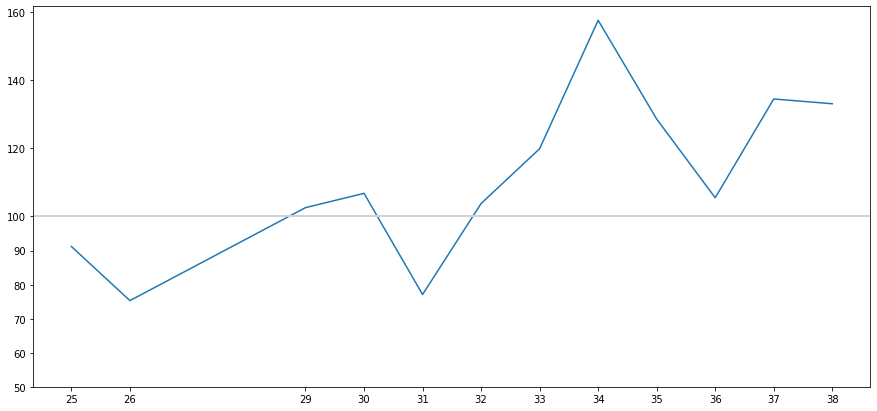

In [56]:
plt.figure(figsize=(15, 7))
yoo = aging_df[aging_df.Name ==  '유한준']
plt.plot(yoo.Age, yoo['WRC+'])
plt.axhline(y=100, color='lightgray', linewidth=2)
plt.xticks(yoo.Age)
plt.yticks([50, 60, 70, 80, 90, 100, 120, 140, 160])
plt.show()

In [ ]:
긍정적으로 보았을 때, 오재일이 이원석 보다 늦게 포텐이 터졌고 일반적으로 타자의 에이징 커브가 시작되는 33세 이후에도
리그 중상급의 생산성을 보이고 있다는 점, 이와 비슷한 케이스로 유한준의 모델을 따른다고 생각하면 FA로서의 가치는 충분하다고 보여짐

In [ ]:
#FA

In [38]:
fa = ['오재일', '최주환', '허경민', '최형우']
fa_df = pd.DataFrame()

for f in fa:
    fa_df = pd.concat([fa_df, df[(df.Name == f) & (df.Season == 2020)][columns]])

fa_df.reset_index(inplace=True, drop=True)
fa_df

,Name,Season,Position,Age,AVG,OBP,SLG,OPS,wOBA,WRC+
0,오재일,2020,1B,34,0.312,0.390,0.482,0.872,0.394,138.9
1,최주환,2020,2B,32,0.305,0.365,0.472,0.838,0.372,123.7
2,허경민,2020,3B,30,0.332,0.382,0.442,0.824,0.373,122.7
3,최형우,2020,DH,37,0.354,0.433,0.590,1.023,0.450,168.4
